<div style="text-align: center;">
  <h1>Updating Master Thesis' Analysis with Modern Statistical Libraries</h1>
  <h3>A Study Overview</h3>

  <hr>

  <p><b>Authors:</b> C. Fabris; P. C. Meletti<br>
  <b>Affiliation:</b> Universidade Estadual de Londrina - UEL / Laboratório de Ecofisiologia Animal<br>
  <b>Date:</b> 26 September 2025</p>

  <hr>
</div>

---

> This document provides an overview of the behavioral data collected in the original study by Fabris (2022), which investigated the sequential application of three behavioral tests in zebrafish (Danio rerio) exposed to ethanol. The original study applied a tiered-test battery consisting of a light-dark test, a novel tank test, and a swimming endurance test, aiming to assess stress- and anxiety-like behaviors while optimizing sampling effort and resources. Initial analyses were conducted using Excel, SigmaPlot, and Past statistical approaches. 
> In the present work, the dataset is being re-evaluated using modern, fully open-access, and reproducible tools in Python, leveraging statistical libraries to allow public inspection and verification via GitHub. This updated analysis seeks to improve transparency, incorporate univariate, multivariate, and Principal Component Analysis (PCA). The ultimate goal is to provide a robust, reproducible, and modernized interpretation of the dataset.

---

<div style="text-align: center;">
<image src="images/zebrafish.jpg" alt="Zebrafish" width="1600">
</div>

<div style="text-align: center;">
<h2>Introduction</h2>
</div>

<div style="text-align: justify;">

<p>Over the past two decades, the zebrafish (<i>Danio rerio</i>) has become a leading vertebrate model in neuroscience and pharmacology, offering a rich behavioral repertoire alongside practical advantages such as low maintenance cost, high reproductive output, and evolutionary conservation of key neurotransmitter systems (<a href="https://doi.org/10.1111/j.1469-185X.2007.00054.x" target="_blank">Spence et al., 2008</a>; <a href="https://doi.org/10.1007/s11065-014-9257-3" target="_blank">Kalueff et al., 2014</a>; <a href="https://doi.org/10.1146/annurev-neuro-072116-031646" target="_blank">Orger & de Polavieja, 2017</a>). These features have made zebrafish increasingly valuable for translational research on stress, anxiety, and neuropsychiatric disorders (<a href="https://doi.org/10.1016/j.bbr.2010.05.031" target="_blank">Stewart et al., 2012</a>; <a href="https://doi.org/10.1016/j.bbr.2009.10.008" target="_blank">Maximino et al., 2010</a>).</p>

<p>Despite this progress, zebrafish studies remain dominated by <b>single-test protocols</b> (e.g., light–dark test, novel tank test, shoaling), which inflate sample sizes, increase costs, and limit opportunities to integrate multidomain behavioral data. By contrast, rodent research has long benefited from <b>sequential behavioral batteries</b>, where the same individuals are tested across paradigms, maximizing data yield per subject and enabling multidimensional profiling (<a href="https://doi.org/10.1016/S0031-9384(01)00511-6" target="_blank">McIlwain et al., 2001</a>; <a href="https://doi.org/10.1016/j.bbr.2011.10.041" target="_blank">Blokland et al., 2012</a>). This methodological gap highlights the need for more efficient and integrative approaches in zebrafish research, consistent with the <b>3Rs principle</b> (Replacement, Reduction, Refinement) (<a href="https://doi.org/10.1007/s11948-006-0006-6" target="_blank">Kolar, 2006</a>).</p>

<p>The original master’s thesis by <b>Fabris (2022)</b> addressed this gap by applying a <b>sequential test battery</b> in zebrafish exposed to ethanol, a well-documented behavioural modulator (<a href="https://doi.org/10.1016/j.pbb.2006.07.013" target="_blank">Gerlai et al., 2006</a>; <a href="https://doi.org/10.1016/j.pbb.2019.172790" target="_blank">Bernardo et al., 2019</a>). The design combined, conceptually in this order:</p>

<ul>
<li><b>Light–Dark Test (LDT)</b> → anxiety-like and phototaxis (<a href="https://doi.org/10.1007/978-1-61779-521-3_12" target="_blank">Stewart et al., 2011</a>; <a href="https://doi.org/10.1163/156853912X640443" target="_blank">Maximino et al., 2012</a>)</li>
<li><b>Novel Tank Test (NTT)</b> → anxiety-like and locomotor exploration (<a href="https://doi.org/10.1007/978-1-61779-521-3_12" target="_blank">Stewart et al., 2011</a>; <a href="https://doi.org/10.1016/j.bbr.2017.06.003" target="_blank">Kysil et al., 2017</a>)</li>
<li><b>Endurance Assay</b> → physical performance as stress-related marker (<a href="https://doi.org/10.1016/S1546-5098(01)00005-7" target="_blank">Baemish et al., 1978</a>; <a href="https://doi.org/10.1016/S1095-6433(01)00042-6" target="_blank">Plaut, 2001</a>)</li>
</ul>

<p>This was the <b>first zebrafish sequential battery</b> spanning multiple domains, evaluated under pharmacological manipulation. Importantly, the study proposed <b>Principal Component Analysis (PCA)</b> as a framework to integrate behavioral endpoints and uncover latent dimensions beyond isolated ANOVAs.</p>

<hr>

<h3>🎯 Purpose of This Notebook</h3>

<p>The present notebook revisits the original dataset with <b>modern, open-source statistical tools in Python</b>. Analyses that were previously conducted in Excel, SigmaPlot, and Past are re-implemented here using reproducible workflows with libraries such as <code>pandas</code>, <code>scipy</code>, <code>statsmodels</code>, and <code>scikit-learn</code>.</p>

<p>By modernizing the statistical pipeline, this work aims to:</p>

<ul>
<li>✅ Ensure <b>transparency and reproducibility</b> (with all code openly available).</li>
<li>✅ Apply <b>univariate, multivariate, and PCA analyses</b> within a coherent framework.</li>
<li>✅ Demonstrate how sequential test batteries can be leveraged in zebrafish research to enhance efficiency and translational relevance.</li>
</ul>

<p>Ultimately, this updated analysis not only strengthens the original conclusions but also sets a precedent for <b>open, reproducible, and resource-efficient behavioral neuroscience</b>.</p>

</div>

---

The **main question** of the work is, therefore, **methodological in essence**:

>Can a sequential behavioral test battery in zebrafish reliably measure stress- and anxiety-like behaviors under pharmacological modulation, without losing sensitivity compared to single, isolated tests, while enabling multidomain analysis of behavior using modern statistical approaches like PCA?

---

## Libraries and Settings

In [140]:
# 🐍📦 Import libraries for analysis & visualization

# 📊 Data handling
import pandas as pd
import numpy as np

# 📈 Statistical analysis
from scipy import stats
from scipy.stats import shapiro, kruskal, fisher_exact, mannwhitneyu
import scikit_posthocs as sp
import itertools
from itertools import combinations

# 🎨 Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Plot & style settings
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (8, 6)
pd.set_option('display.max_columns', None)
from warnings import filterwarnings
filterwarnings('ignore')

In [141]:
# Overall Functions
def kruskal_dunn(df, time, value_col="latency"):
    """
    Run Kruskal-Wallis and pairwise Mann-Whitney U tests with Bonferroni correction.
    
    df : pandas DataFrame
        Must have columns 'group' and the chosen value_col (e.g., 'latency', 'distance', etc.)
    time : str
        Timepoint prefix (e.g., '01h', '24h', '96h')
    value_col : str
        The numeric column to test
    """
    
    subset = df[df["group"].str.startswith(time)]
    groups = subset["group"].unique()
    
    # Prepare arrays per group
    data_groups = [subset[subset["group"]==g][value_col].values for g in groups]
    
    # Kruskal-Wallis
    H, p = stats.kruskal(*data_groups)
    
    # Pairwise Mann-Whitney U (Dunn-like) with Bonferroni correction
    pairs = {}
    for g1, g2 in combinations(groups, 2):
        d1 = subset[subset["group"]==g1][value_col].values
        d2 = subset[subset["group"]==g2][value_col].values
        U, p_pair = stats.mannwhitneyu(d1, d2, alternative='two-sided')
        # Bonferroni correction
        p_pair_corrected = min(p_pair * len(groups)*(len(groups)-1)/2, 1.0)
        pairs[(g1, g2)] = p_pair_corrected
    
    return H, p, pairs

groups = ['0.0%', '0.5%', '1.0%']
times = ['01h', '24h', '96h']

def pairwise_pvalue_heatmap(df, group_col, value_col, test='fisher', figsize=(12,10), title=None):
    groups = df[group_col].unique()
    n = len(groups)
    
    # Initialize matrix
    p_matrix = pd.DataFrame(np.ones((n, n)), index=groups, columns=groups)
    
    # Compute pairwise p-values
    for g1, g2 in combinations(groups, 2):
        data1 = df[df[group_col]==g1][value_col].values
        data2 = df[df[group_col]==g2][value_col].values
        
        if test == 'fisher':
            # contingency table for binary data
            table = pd.crosstab(pd.Series(data1), pd.Series(data2))
            # Make 2x2 table, handle missing rows
            table = table.reindex(index=[0,1], columns=[0,1], fill_value=0)
            _, p = fisher_exact(table)
        elif test == 'mannwhitney':
            _, p = mannwhitneyu(data1, data2, alternative='two-sided')
        else:
            raise ValueError("test must be 'fisher' or 'mannwhitney'")
        
        p_matrix.loc[g1, g2] = round(p, 3)
        p_matrix.loc[g2, g1] = round(p, 3)
    
    np.fill_diagonal(p_matrix.values, np.nan)
    
    plt.figure(figsize=figsize)
    sns.heatmap(
        p_matrix.astype(float),
        annot=True,
        fmt=".3f",
        cmap="Reds_r",
        linewidths=0.5,
        cbar_kws={'label': 'p-value'}
    )
    plt.title(title or f"Pairwise {test.title()} p-values", fontsize=16)
    plt.yticks(rotation=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return p_matrix

## Data Extraction

In [142]:
data_path = r"C:\Users\caiqu\OneDrive\Documents\Masters"

# 📂 Load datasets
df = pd.read_csv(f"{data_path}/battery_suite_1.csv") # Full battery (LDT - NTT - Endurance)

df = df.drop(columns=['Unnamed: 0']) # Drop unnecessary index column
df = df.set_index('fish_id') # Set fish_id as index

<div style="text-align: center;">
    <h3>About the Dataset</h3>
</div>

<div style="text-align: justify">
This dataset was generated by <b>Fabris (2022)</b> at the Laboratory of Animal Ecophysiology in the Universidade Estadual de Londrina (UEL), in experiments testing the effects of ethanol exposure on zebrafish (<i>Danio rerio</i>). Each entry corresponds to one fish, with identifiers linking group, ethanol treatment and exposure time. Variables include behavioral measures (<i>e.g.</i> latency, zone preference, locomotion, velocity, resistance indices), morphological traits (lengths, weight, condition factor, sex, blood sugar), and environmental parameters (water conductivity and pH). Together, these records provide a multidimensional view of how ethanol affects zebrafish behavior and physiology under controlled laboratory conditions.
</div>

## Checking Overall Numerical Data Normality

In [143]:
# Checking Normality for each numerical column
num_df = df.select_dtypes(include=[np.number])  # Select only numerical columns
num_cols = num_df.columns
normal_cols = []

for col in num_cols:
    stat, p = shapiro(df[col])
    if p > 0.05:
        normal_cols.append((col, stat, p, True))

# Display results
if normal_cols:
    print("Columns that are normally distributed:")
    for col, stat, p, in normal_cols:
        print(f"{col}: stat={stat:.3f}, p={p:.3f}")
else:
    print("No columns are normally distributed.")


No columns are normally distributed.


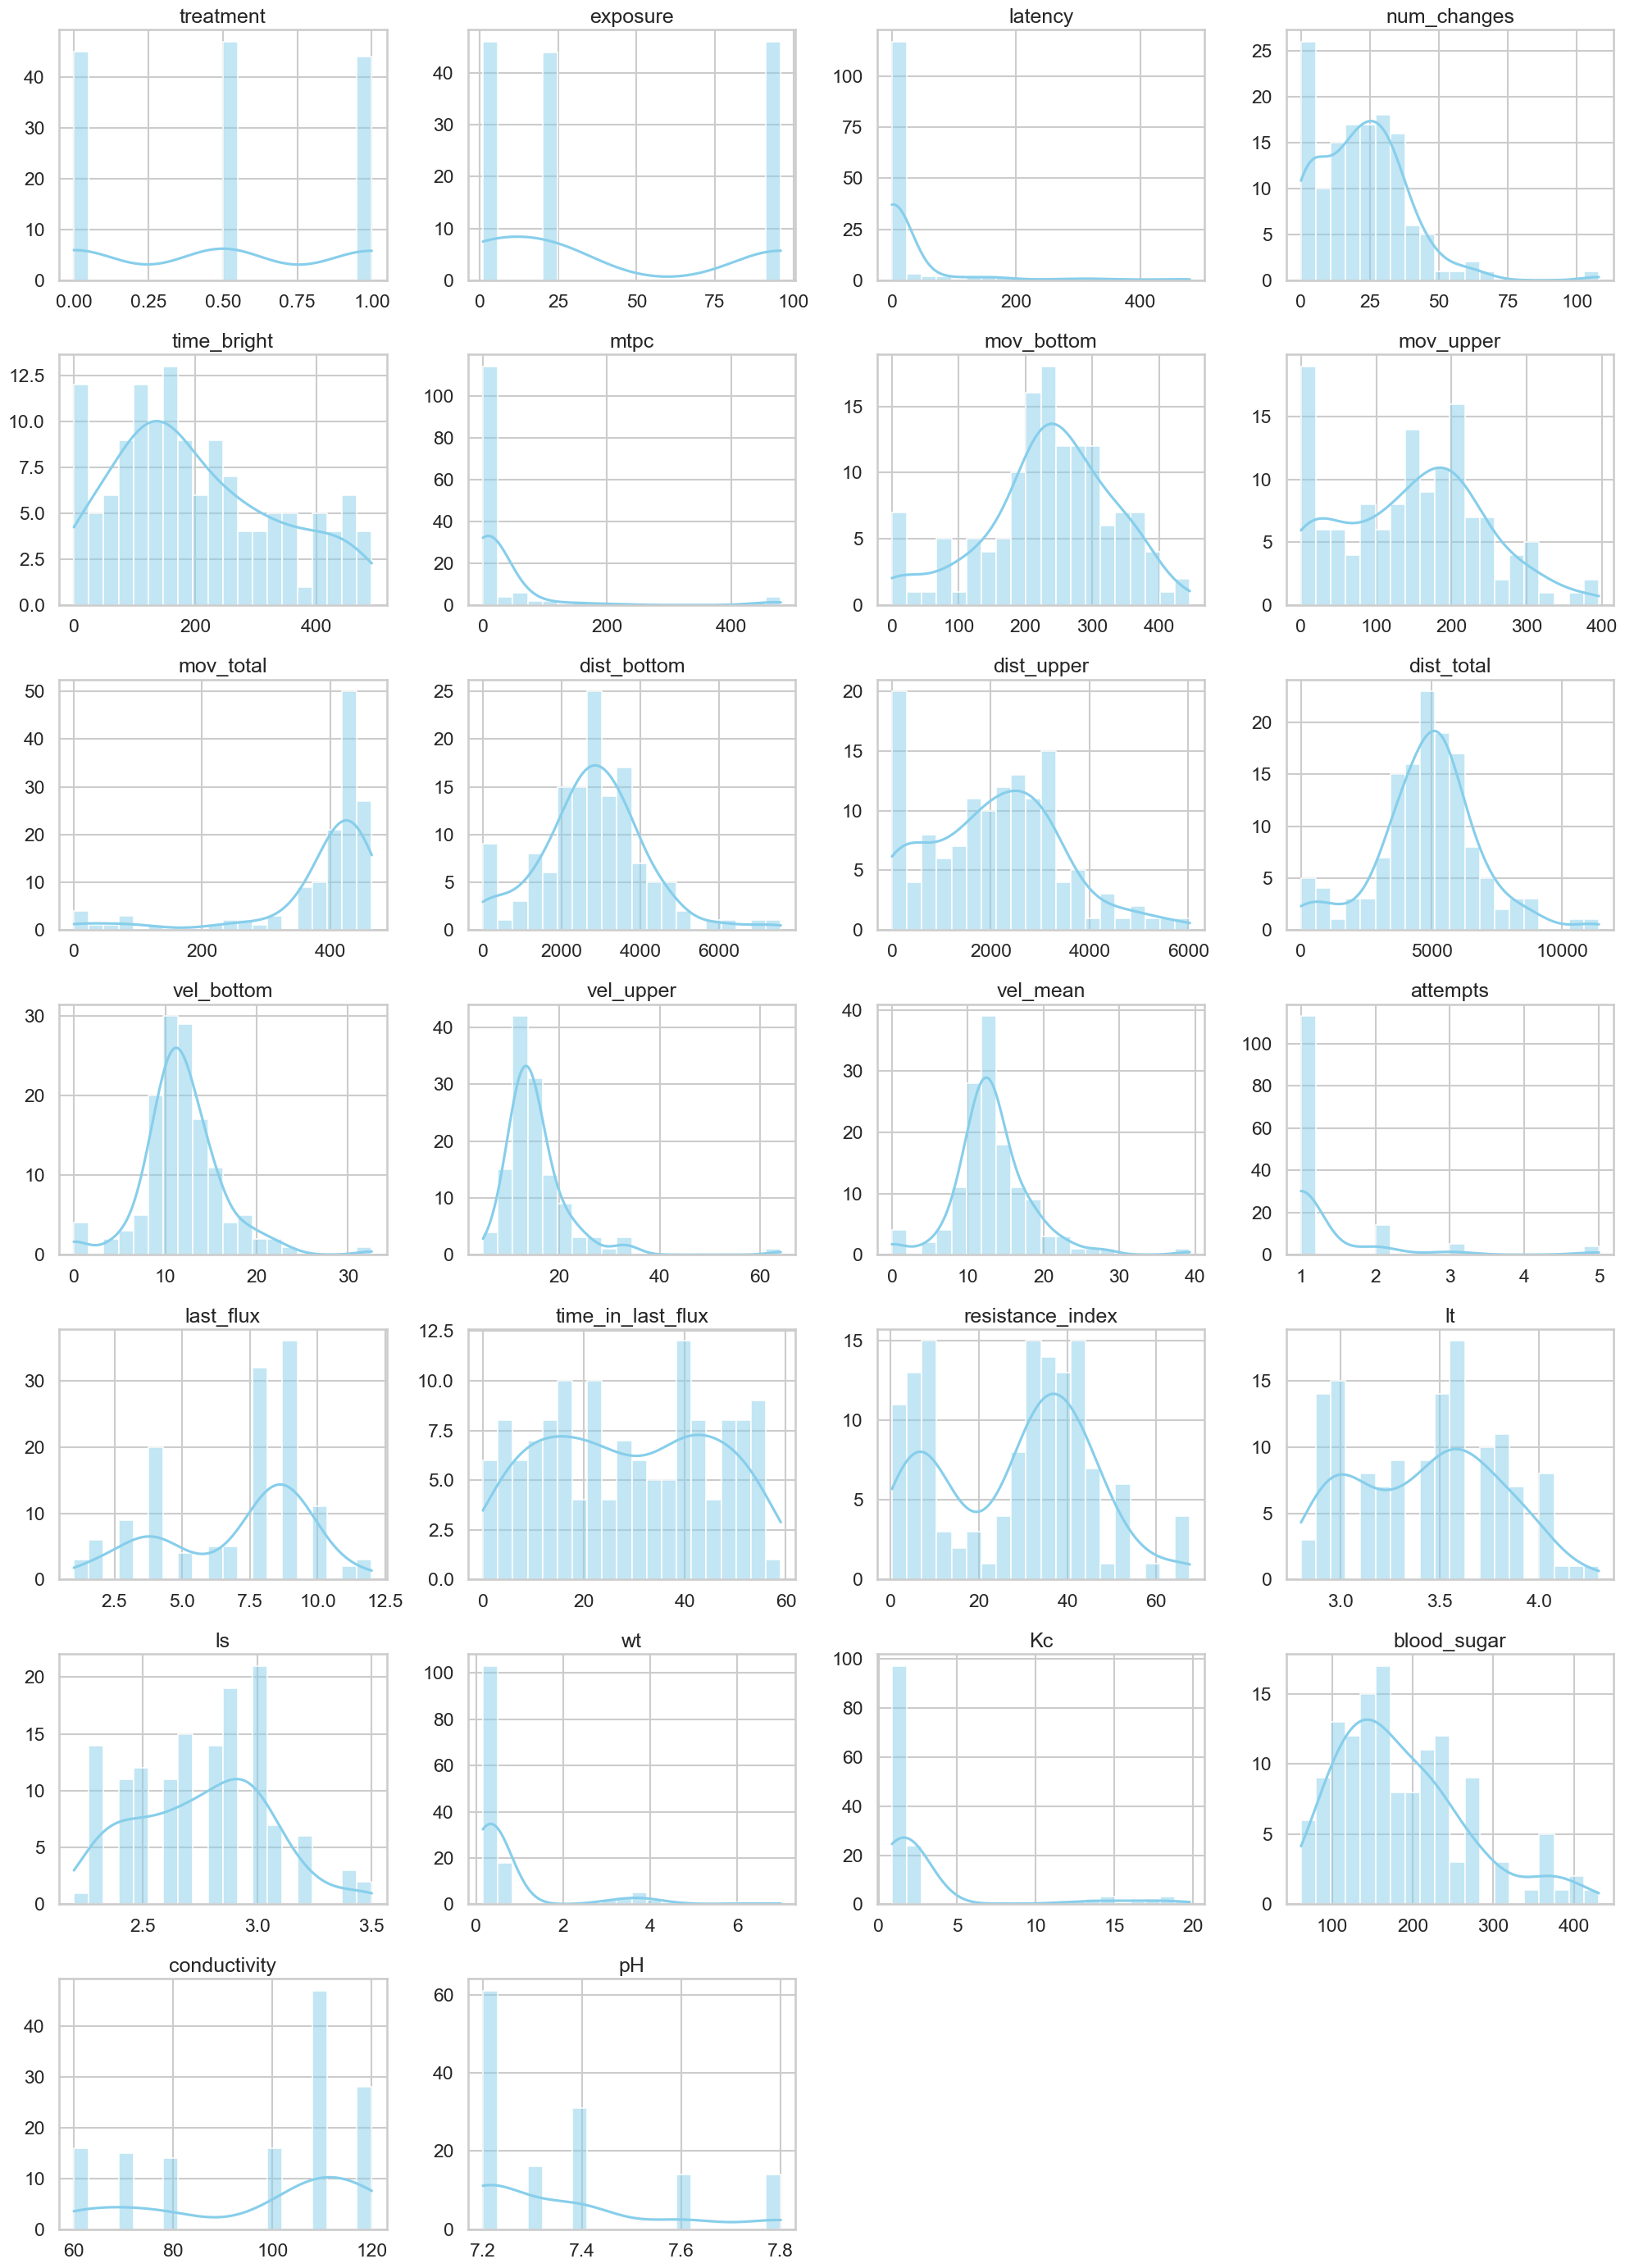

In [144]:
# Visualizing numerical data distribution
n_cols = 4 # Number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

All parameters are **non-normal**. Therefore, Parametric tests (t-tests, ANOVA) cannot be reliably used on this raw dataset.

## Checking Overall Data Correlation

<div style="text-align: justify;">
    <p>
    We are using Spearman correlation instead of Pearson because our data is not normally distributed, as previously indicated by the Shapiro–Wilk tests. Spearman’s method is a non-parametric rank-based correlation, which assesses monotonic relationships between variables without assuming linearity or normality. This makes it more robust for behavioral datasets like this one, where distributions can be skewed or contain outliers, ensuring that the correlations reflect genuine associations rather than artifacts of distribution shape.
    </p>
</div>

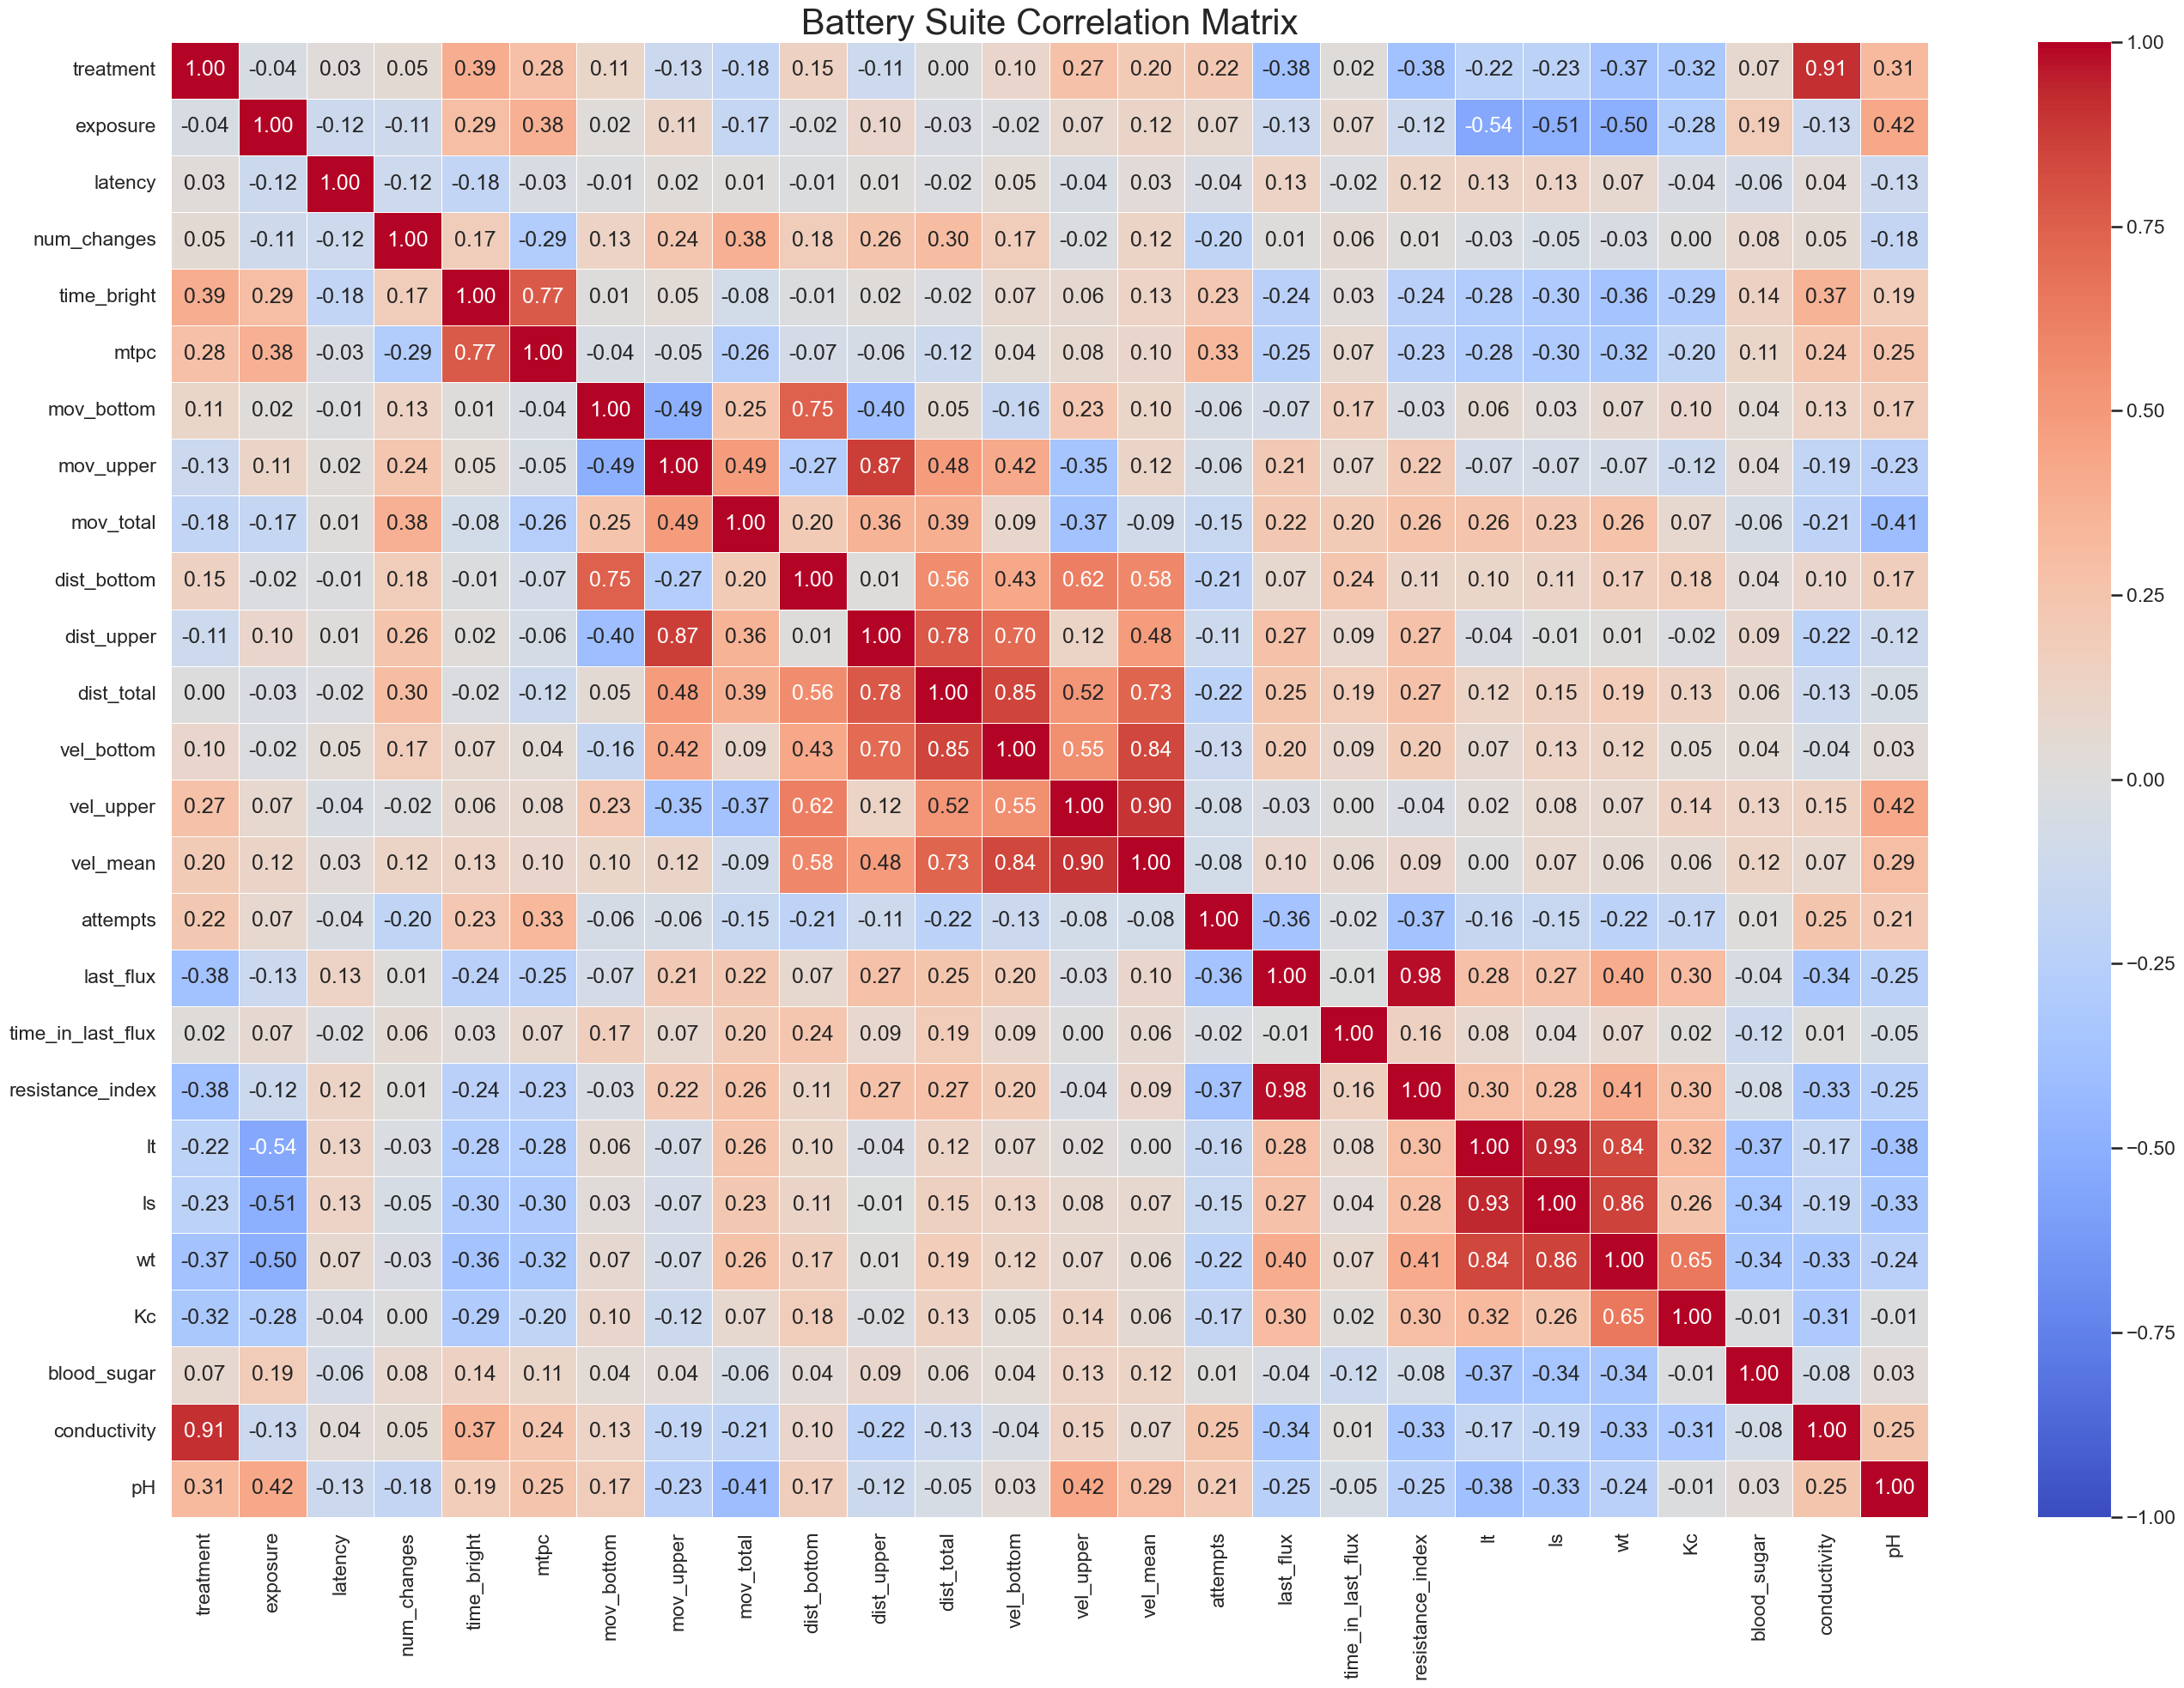

In [145]:
# Visualizing Pearsoncorrelation matrix
plt.figure(figsize=(28, 20))

# Create a heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    fmt=".2f",         # number format
    cmap="coolwarm",   # blue=negative, red=positive
    center=0,          # center the colormap at 0
    linewidths=0.5,    # grid lines
    vmin=-1, vmax=1    # scale from -1 to 1
)

plt.title("Battery Suite Correlation Matrix", size=30)
plt.tight_layout()
plt.show()

---

<div style="text-align: center;">
    <h2>The Light-Dark Test</h2>
</div>

<p align="center">
  <img src="images/light-dark_box.jpg" alt="Light-Dark Box" width="1500">
</p>

<div style="text-align: justify; line-height: 1.6;">
  <p>
    The light–dark test evaluates anxiety-like behavior in zebrafish by exploiting their preference for dark areas. Key measures, in chronological order, include <b>latency to choose a zone</b> (longer delays indicate higher anxiety; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8770442/">Fontana et al., 2021</a>), <b>first choice</b> (initial compartment entered; <a href="https://pubmed.ncbi.nlm.nih.gov/28359882/">Facciol et al., 2017</a>), <b>time spent in the bright area</b> (less time indicates higher anxiety; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6919307/">Dahlén et al., 2019</a>), <b>number of transitions</b> (activity or risk-taking; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8770442/">Fontana et al., 2021</a>), and <b>mean time per change</b> (MTPC), reflecting exploration dynamics. This test is sensitive, reliable, and widely used as an isolated assay in zebrafish behavioral studies.
  </p>
</div>

In [146]:
# filtering LDT data only
box = df[[
    'group', 'latency', 'first_choice', 'num_changes', 'time_bright', 'mtpc'
]]

#### Latency

In [147]:
# Summary statistics for latency by group
box.groupby('group')['latency'].agg(['mean', 'std', 'median', 'min', 'max', 'count']).round(2)

,mean,std,median,min,max,count
group,,,,,,
01h 0.0%,25.64,70.60,0.0,0.0,259.0,14
01h 0.5%,60.31,127.09,0.0,0.0,480.0,16
01h 1.0%,39.88,86.73,0.0,0.0,304.0,16
24h 0.0%,13.60,43.78,0.0,0.0,170.0,15
24h 0.5%,57.00,119.72,2.0,0.0,363.0,15
24h 1.0%,2.43,4.24,0.0,0.0,10.0,14
96h 0.0%,9.19,23.91,0.0,0.0,93.0,16
96h 0.5%,28.94,108.40,0.0,0.0,435.0,16
96h 1.0%,1.86,5.11,0.0,0.0,18.0,14


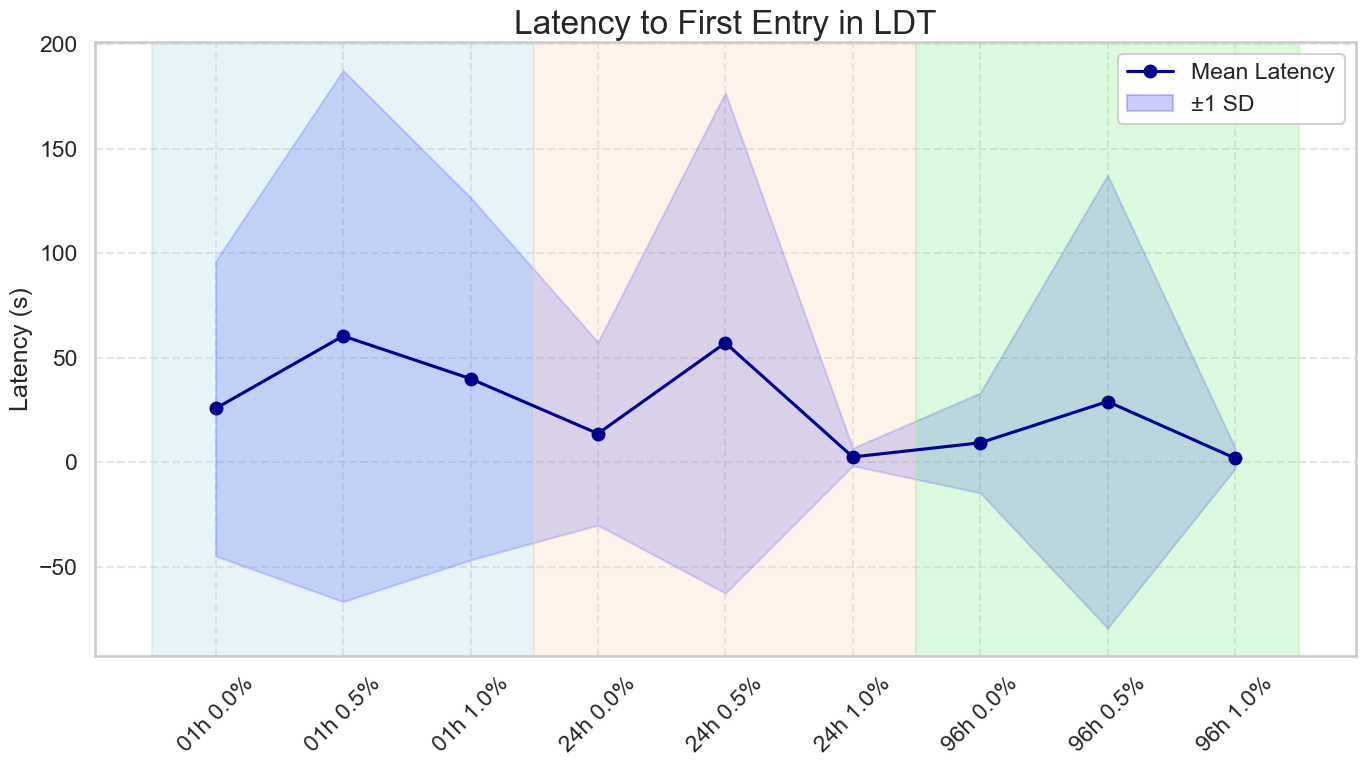

In [148]:
# Visualizing Latency by group with mean ± SD
# Define universal labels in order
labels = ['01h 0.0%', '01h 0.5%', '01h 1.0%',
          '24h 0.0%', '24h 0.5%', '24h 1.0%',
          '96h 0.0%', '96h 0.5%', '96h 1.0%']

# Mean and SD values in same order
mean_values = [25.64, 60.31, 39.88,
               13.60, 57.00, 2.43,
               9.19, 28.94, 1.86]

std_values = [70.60, 127.09, 86.73,
              43.78, 119.72, 4.24,
              23.91, 108.40, 5.11]

x = np.arange(len(labels))  # 0..8

plt.figure(figsize=(14,8))

# Plot mean ± SD
plt.plot(x, mean_values, marker='o', color='darkblue', label='Mean Latency')
plt.fill_between(x,
                 [m - s for m, s in zip(mean_values, std_values)],
                 [m + s for m, s in zip(mean_values, std_values)],
                 color='blue', alpha=0.2, label='±1 SD')

# Background regions for time clusters
plt.axvspan(-0.5, 2.5, color='#ADD8E6', alpha=0.3)  # 01h
plt.axvspan(2.5, 5.5, color='#FFDAB9', alpha=0.3)  # 24h
plt.axvspan(5.5, 8.5, color='#90EE90', alpha=0.3)  # 96h

plt.title("Latency to First Entry in LDT", size=24)
plt.ylabel("Latency (s)")
plt.xticks(x, labels, rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', framealpha=0.9)
plt.tight_layout()
plt.show()


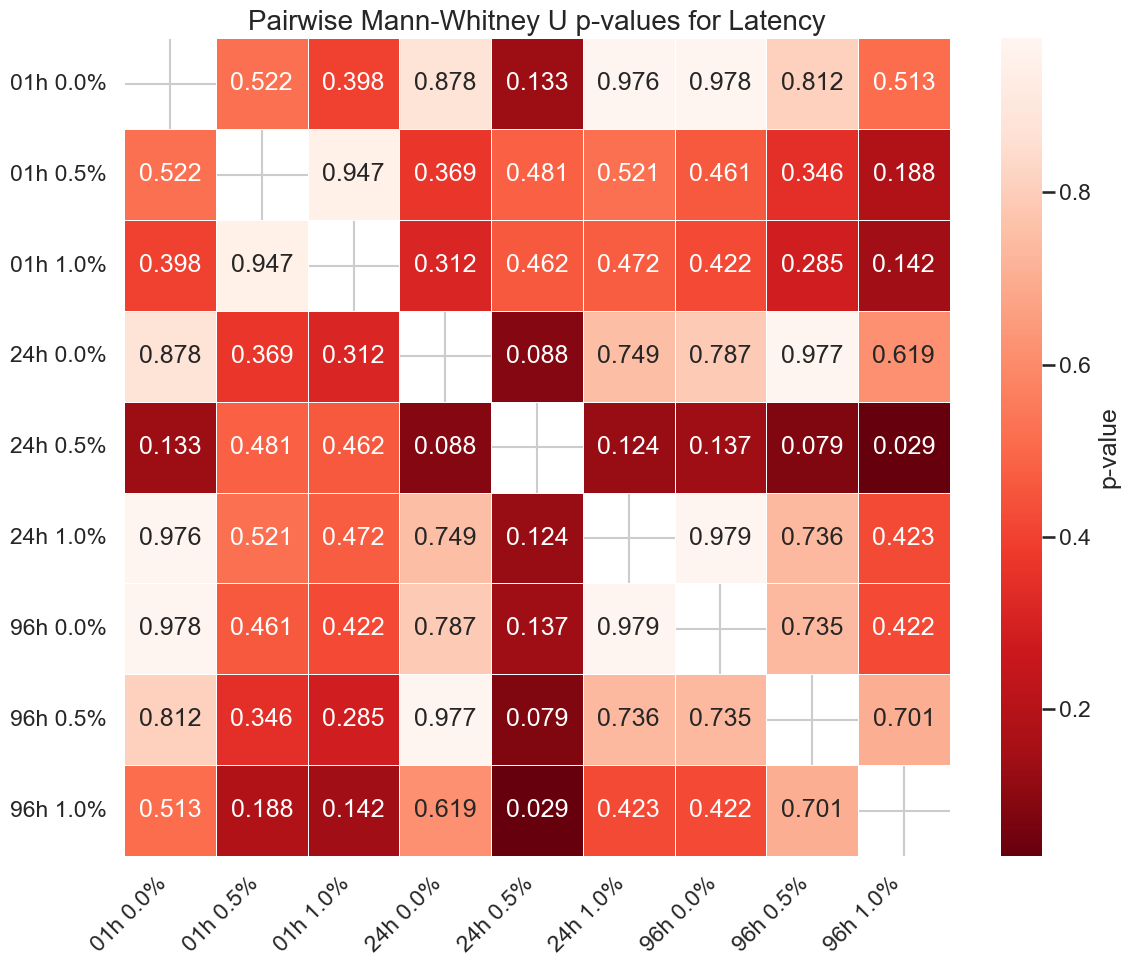

In [149]:
# Visualizing pairwise Mann-Whitney U p-values in a heatmap
all_groups_latency = box['group'].unique()
n = len(all_groups_latency)

# Initialize empty DataFrame
p_matrix_latency = pd.DataFrame(np.ones((n, n)), index=all_groups_latency, columns=all_groups_latency)

# Fill upper triangle with pairwise Mann-Whitney U p-values
for g1, g2 in combinations(all_groups_latency, 2):
    d1 = box[box['group']==g1]['latency'].values
    d2 = box[box['group']==g2]['latency'].values
    U, p = stats.mannwhitneyu(d1, d2, alternative='two-sided')
    p_matrix_latency.loc[g1, g2] = round(p, 3)
    p_matrix_latency.loc[g2, g1] = round(p, 3)  # symmetric

# Optionally, set diagonal to NaN for clarity
np.fill_diagonal(p_matrix_latency.values, np.nan)

# Display
p_matrix_latency.fillna('')

plt.figure(figsize=(12,10))
sns.heatmap(
    p_matrix_latency.astype(float),
    annot=True,            # show p-values
    fmt=".3f",
    cmap="Reds_r",         # reversed Reds: lower = redder
    linewidths=0.5,
    cbar_kws={'label': 'p-value'}
)

plt.title("Pairwise Mann-Whitney U p-values for Latency", fontsize=20)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<p style="text-align: justify;">
In this study, <strong>latency</strong> was defined as the time required for zebrafish to make their first entry into either compartment of the LDT, serving as an indicator of hesitation and exploratory drive. Across ethanol concentrations and timepoints, latency exhibited a biphasic trend: moderate ethanol exposure (0.5%) increased latency, suggesting reduced exploratory drive and heightened hesitation, whereas high ethanol exposure (1.0%) at later timepoints (96h) led to markedly lower latency, consistent with faster, non-hesitant entries. Interestingly, most pairwise comparisons did not reach statistical significance, with the only exception being the difference between <em>96h 1%</em> and <em>24h 0.5%</em>, highlighting a specific temporal interaction. Despite this, these findings support the utility of a sequential behavioral test battery, as the patterns of latency remained detectable across multiple assays, indicating that sequential testing does not abolish sensitivity to pharmacological modulation (<a href="https://pubmed.ncbi.nlm.nih.gov/26026898/" target="_blank" rel="noopener">Magno et al., 2015</a>; <a href="https://www.sciencedirect.com/science/article/abs/pii/S0091305718305586" target="_blank" rel="noopener">Mathur &amp; Guo, 2011</a>; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3804555/" target="_blank" rel="noopener">Stewart et al., 2013</a>).
</p>

#### First Choice

In [150]:
# Transforming First Choice data into Numeric
clean_first_choice = {
    'bright' : 1,
    'dark' : 0
}

box['first_choice'] = box['first_choice'].replace(clean_first_choice)

In [151]:
box.groupby('group')['first_choice'].agg(['mean', 'std', 'count']).round(2)

,mean,std,count
group,,,
01h 0.0%,0.79,0.43,14
01h 0.5%,0.40,0.51,15
01h 1.0%,0.44,0.51,16
24h 0.0%,0.47,0.52,15
24h 0.5%,0.73,0.46,15
24h 1.0%,1.00,0.00,14
96h 0.0%,0.50,0.52,16
96h 0.5%,0.94,0.25,16
96h 1.0%,0.86,0.36,14


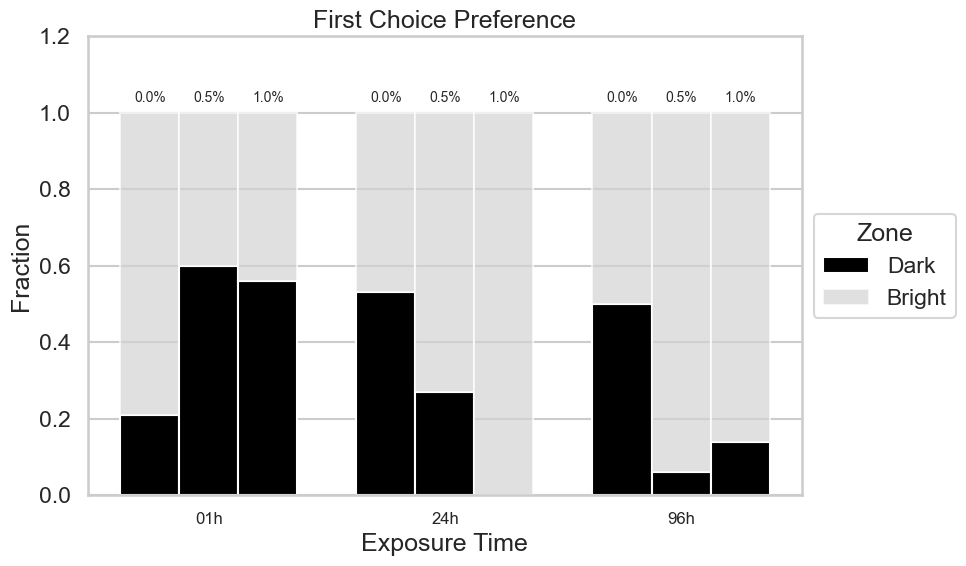

In [152]:
# Mean light preference
first_choice_means = {
    '01h': [0.79, 0.40, 0.44],
    '24h': [0.47, 0.73, 1.00],
    '96h': [0.50, 0.94, 0.86]
}

# Convert to dark fraction
dark_fraction = {t: [1 - m for m in first_choice_means[t]] for t in times}

n_groups = len(groups)
width = 0.25

x = np.arange(len(times))  # cluster centers

fig, ax = plt.subplots(figsize=(10,6))

# Plot bars per concentration
for i, g in enumerate(groups):
    bar_positions = x + (i - 1)*width
    dark_vals = [dark_fraction[t][i] for t in times]
    light_vals = [first_choice_means[t][i] for t in times]
    ax.bar(bar_positions, dark_vals, width, color='black')
    ax.bar(bar_positions, light_vals, width, bottom=dark_vals, color='lightgrey', alpha=0.7)

# X-axis labels for clusters (time)
ax.set_xticks(x)
ax.set_xticklabels(times, fontsize=12)
ax.set_xlabel('Exposure Time')

# Add concentration labels above bars
for i, t in enumerate(times):
    for j, g in enumerate(groups):
        pos = x[i] + (j - 1)*width
        ax.text(pos, 1.02, g, ha='center', va='bottom', fontsize=10)

# Labels and title
ax.set_ylabel('Fraction')
ax.set_title('First Choice Preference')

# Legend outside the chart
ax.legend(['Dark', 'Bright'], loc='center left', bbox_to_anchor=(1, 0.5), title='Zone')

# Only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.set_axisbelow(True)

plt.ylim(0, 1.2)
plt.tight_layout()
plt.show()

In [153]:
# Statistical analysis for First Choice using Fisher Exact test with Bonferroni correction
# Extract time and concentration from 'group'
box['time'] = box['group'].str.extract(r'(\d+h)')[0]
box['conc'] = box['group'].str.extract(r'(\d+\.?\d*%)')[0]

# Unique timepoints
times = box['time'].unique()

# Store results
all_results = []

for t in times:
    sub = box[box['time'] == t]
    concs = sub['conc'].unique()
    
    n_comparisons = len(concs) * (len(concs)-1) / 2
    
    comparisons = []
    for c1, c2 in combinations(concs, 2):
        # Contingency table for first_choice (0 or 1)
        data1 = sub[sub['conc'] == c1]['first_choice'].value_counts()
        data2 = sub[sub['conc'] == c2]['first_choice'].value_counts()
        
        table = pd.DataFrame({c1: data1, c2: data2}).fillna(0).astype(int)
        table = table.reindex(index=[0,1], columns=[c1,c2], fill_value=0)
        
        # Fisher Exact test
        _, p = fisher_exact(table)
        
        # Bonferroni correction
        p_corr = min(p * n_comparisons, 1.0)
        
        comparisons.append({
            'Time': t,
            'Comparison': f'{c1} vs {c2}',
            'p-value': round(p_corr, 4)
        })
    
    df_results = pd.DataFrame(comparisons)
    all_results.append(df_results)
    print(f"\nPairwise Fisher Exact p-values for First Choice ({t}):")
    print(df_results.to_string(index=False))

# Optionally combine all results
final_results = pd.concat(all_results, ignore_index=True)


Pairwise Fisher Exact p-values for First Choice (01h):
Time   Comparison  p-value
 01h 0.0% vs 0.5%   0.1813
 01h 0.0% vs 1.0%   0.2152
 01h 0.5% vs 1.0%   1.0000

Pairwise Fisher Exact p-values for First Choice (24h):
Time   Comparison  p-value
 24h 0.0% vs 0.5%   0.7906
 24h 0.0% vs 1.0%   0.0066
 24h 0.5% vs 1.0%   0.2989

Pairwise Fisher Exact p-values for First Choice (96h):
Time   Comparison  p-value
 96h 0.0% vs 0.5%   0.0465
 96h 0.0% vs 1.0%   0.1730
 96h 0.5% vs 1.0%   1.0000


<p style="text-align: justify;">
In this study, <strong>first choice</strong> was defined as the initial compartment selected by zebrafish in the LDT, reflecting early preference and motivational bias. Across ethanol concentrations and timepoints, first choice behavior was both time- and concentration-dependent. At 01h, no comparisons reached statistical significance, suggesting minimal acute effects of ethanol on initial preference. By 24h, the difference between <em>0.0%</em> and <em>1.0%</em> ethanol reached significance (p = 0.0066), indicating a delayed effect of higher ethanol exposure on first choice behavior. At 96h, <em>0.0%</em> versus <em>0.5%</em> also showed a significant difference (p = 0.0465), reflecting a concentration-dependent modulation that emerges over time. Overall, these patterns demonstrate that initial compartment preference in zebrafish is sensitive to both ethanol concentration and exposure duration, emphasizing the importance of temporal dynamics in behavioral pharmacology (<a href="https://pubmed.ncbi.nlm.nih.gov/26026898/" target="_blank" rel="noopener">Magno et al., 2015</a>; <a href="https://www.sciencedirect.com/science/article/abs/pii/S0091305718305586" target="_blank" rel="noopener">Mathur &amp; Guo, 2011</a>; <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3804555/" target="_blank" rel="noopener">Stewart et al., 2013</a>).
</p>

#### Time in the Bright

In [154]:
print(groups)

['0.0%', '0.5%', '1.0%']


#### Number of Changes

#### Mean Time per Change (MTPC)

---

<div style="text-align: center;">
    <h2>The Novel Tank Test</h2>
</div>

<div style="text-align: center;">
    <img src="images/ntt.jpg" width="1200" alt="Novel Tank Image">
</div>

### Time of Movement

#### Movement on the Bottom Portion

#### Movement on the Upper Portion

#### Total Movement

### Distance Covered

#### Distance swam in the Bottom Portion

#### Distance swam in the Upper Portion

#### Total Distance

### Velocity

#### Mean Velocity on the Bottom Portion

#### Mean Velocity on the Upper Portion

#### Mean Velocity Overall

---

<div style="text-align: center;">
    <h2>The Endurance Test</h2>
</div>

<div style="text-align: center;">
    <img src="images/endurance.jpg" width="1400" alt="Endurance Image">
</div>

### Attempts

### Endurance Index

---

<div style="text-align: center;">
    <h2>Biometric and Physiologic</h2>
</div>

![](images/bio.jpg)